In [853]:
import shap
import pydot
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import datasets
from lime import lime_tabular
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import (
    DecisionTreeClassifier
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    f1_score,
)

## Código:

### Data Understanding:

In [854]:
class DataUnderstanding():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def frequencia_da_repetição_dos_valores(self, dataframe, coluna):
        dataframe = dataframe[coluna].value_counts().reset_index()
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe

### Data Preparetion:

In [855]:
class DataPreparetion(DataUnderstanding):
    def removendo_nulos(self, dataframe):
        return dataframe.dropna()
    
    def removendo_colunas(self, dataframe, colunas=[]):
        return dataframe.drop(colunas, axis=1)

    def substituindo_valores(self, dataframe, colunas, valores):      
        return dataframe[colunas].replace(valores)
    
    def convertendo_para_inteiro(self, dataframe, colunas):
        return dataframe[colunas].astype(int)

    def dummy_todas_as_colunas(self, dataframe):
        return pd.get_dummies(dataframe)

    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe[colunas])
        colunas = dataframe.columns
        return dataframe, colunas
    
    def label_endcode(self, dataframe):
        training = LabelEncoder().fit(dataframe)
        dataframe = training.transform(dataframe)
        return dataframe
    
    def normalizando_os_dados(self, dataframe):
        return scale(dataframe)

### Data Visualization:

In [856]:
class DataVisualization(DataPreparetion):
    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_linha_desempenho_do_modelo(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def gráfico_de_regressão_lmplot(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_outliers_boxplot(self, dataframe, figsize):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        fig = plt.figure(figsize=figsize)
        sns.boxplot(data=dataframe)
        plt.show()

    def gráfico_de_distribuição_histplot(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

# Regressão Logística:

## Dataframe:

### Seaborn Iris:

In [857]:
df_iris = sns.load_dataset("iris")

In [858]:
display(df_iris.head())

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Código:

In [859]:
class RegressãoLogística(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
        

if __name__ == '__main__':
    regressão_logística = RegressãoLogística()

## Output:

### Data Understanding:

In [860]:
display(df_iris.head())

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [861]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Modelo:

In [862]:
x = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = ['species']

In [863]:
training, y_pred = regressão_logística.training(
    dataframe=df_iris,
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [864]:
df_iris['predictions'] = regressão_logística.predictions(
    training=training,
    input=df_iris[x]
)

In [865]:
display(df_iris[df_iris['species'] != df_iris['predictions']])

sepal_length  sepal_width  petal_length  petal_width     species  \
70           5.9          3.2           4.8          1.8  versicolor   
77           6.7          3.0           5.0          1.7  versicolor   
83           6.0          2.7           5.1          1.6  versicolor   

   predictions  
70   virginica  
77   virginica  
83   virginica

## Exercise:

## Dataframe:

### Golf:

In [866]:
path = r'../../../../data/golf_df.xlsx'
df_golf = pd.read_excel(
    io=path
)

In [867]:
display(df_golf.head())

clima  temp umidade vento jogar
0     sunny   hot    high    no    no
1     sunny   hot    high   yes    no
2  overcast   hot    high    no   yes
3     rainy  mild    high    no   yes
4     rainy  cool  normal    no   yes

### Código:

In [868]:
class exercise(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
        

if __name__ == '__main__':
    exercise = exercise()

### Output:

### Data Understanding:

In [869]:
display(df_golf.head())

clima  temp umidade vento jogar
0     sunny   hot    high    no    no
1     sunny   hot    high   yes    no
2  overcast   hot    high    no   yes
3     rainy  mild    high    no   yes
4     rainy  cool  normal    no   yes

In [870]:
df_golf.columns

Index(['clima', 'temp', 'umidade', 'vento', 'jogar'], dtype='object')

In [871]:
for coluna in df_golf.columns:
    print(f'{coluna}:')
    display(exercise.frequencia_da_repetição_dos_valores(
        dataframe=df_golf,
        coluna=coluna
    ))

clima:


index  clima
0     sunny      5
1     rainy      5
2  overcast      4

temp:


index  temp
0  mild     6
1   hot     4
2  cool     4

umidade:


index  umidade
0    high        7
1  normal        7

vento:


index  vento
0    no      8
1   yes      6

jogar:


index  jogar
0   yes      9
1    no      5

### Data Preparetion:

In [872]:
colunas = ['clima', 'temp', 'umidade', 'vento']

In [873]:
for coluna in colunas:
    df_golf[coluna] = exercise.label_endcode(
        dataframe=df_golf[coluna],
    )

### Modelo:

In [874]:
df_golf.columns

Index(['clima', 'temp', 'umidade', 'vento', 'jogar'], dtype='object')

In [875]:
x = ['clima', 'temp', 'umidade', 'vento']
y = ['jogar']

In [876]:
training, y_pred = exercise.training(
    dataframe=df_golf,
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [877]:
df_golf['predictions'] = exercise.predictions(
    training=training,
    input=df_golf[x]
)

In [878]:
display(df_golf.head())

clima  temp  umidade  vento jogar predictions
0      2     1        0      0    no         yes
1      2     1        0      1    no          no
2      0     1        0      0   yes         yes
3      1     2        0      0   yes         yes
4      1     0        1      0   yes         yes

In [879]:
display(df_golf[df_golf['jogar'] != df_golf['predictions']])

clima  temp  umidade  vento jogar predictions
0       2     1        0      0    no         yes
5       1     0        1      1    no         yes
10      2     2        1      1   yes          no

# Árvore de Decisão:

## Dataframe:

### Vendas:

In [880]:
path = r'../../../../data/vendas.xlsx'
df_sales = pd.read_excel(
    io=path
)

In [881]:
display(df_sales.head())

media_rating  media_pedidos test cliente_comprou
0           1.5             11   No             Yes
1           2.5             11   No              No
2           2.5             11   No              No
3           1.5             13   No             Yes
4           2.5             13   No              No

## Código:

In [882]:
class ÁrvoreDeDecisão(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            DecisionTreeClassifier().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore


if __name__ == '__main__':
    árvore_de_decisão = ÁrvoreDeDecisão()

## Output:

### Data Understanding:

In [883]:
display(df_sales.head())

media_rating  media_pedidos test cliente_comprou
0           1.5             11   No             Yes
1           2.5             11   No              No
2           2.5             11   No              No
3           1.5             13   No             Yes
4           2.5             13   No              No

In [884]:
x = ["media_rating", "media_pedidos", "test"]
y = ["cliente_comprou"]

### Data Preparetion:

In [885]:
df_sales_copy = df_sales.copy()

In [886]:
dataframe, colunas = árvore_de_decisão.dummy(
    dataframe=df_sales,
    colunas=x
)
df_sales[colunas] = dataframe[colunas]

In [887]:
df_sales = árvore_de_decisão.removendo_colunas(
    dataframe=df_sales,
    colunas=['test']
)

In [888]:
df_sales['cliente_comprou'] = exercise.label_endcode(
    dataframe=df_sales['cliente_comprou'],
)

In [889]:
display(df_sales.head())

media_rating  media_pedidos  cliente_comprou  test_No  test_Yes
0           1.5             11                1        1         0
1           2.5             11                0        1         0
2           2.5             11                0        1         0
3           1.5             13                1        1         0
4           2.5             13                0        1         0

In [890]:
df_sales.columns

Index(['media_rating', 'media_pedidos', 'cliente_comprou', 'test_No',
       'test_Yes'],
      dtype='object')

### Modelo:

In [891]:
x = ['media_rating', 'media_pedidos', 'test_No', 'test_Yes']
y = ["cliente_comprou"]

In [892]:
training, y_pred = árvore_de_decisão.training(
    dataframe=df_sales,
    x=x,
    y=y
)

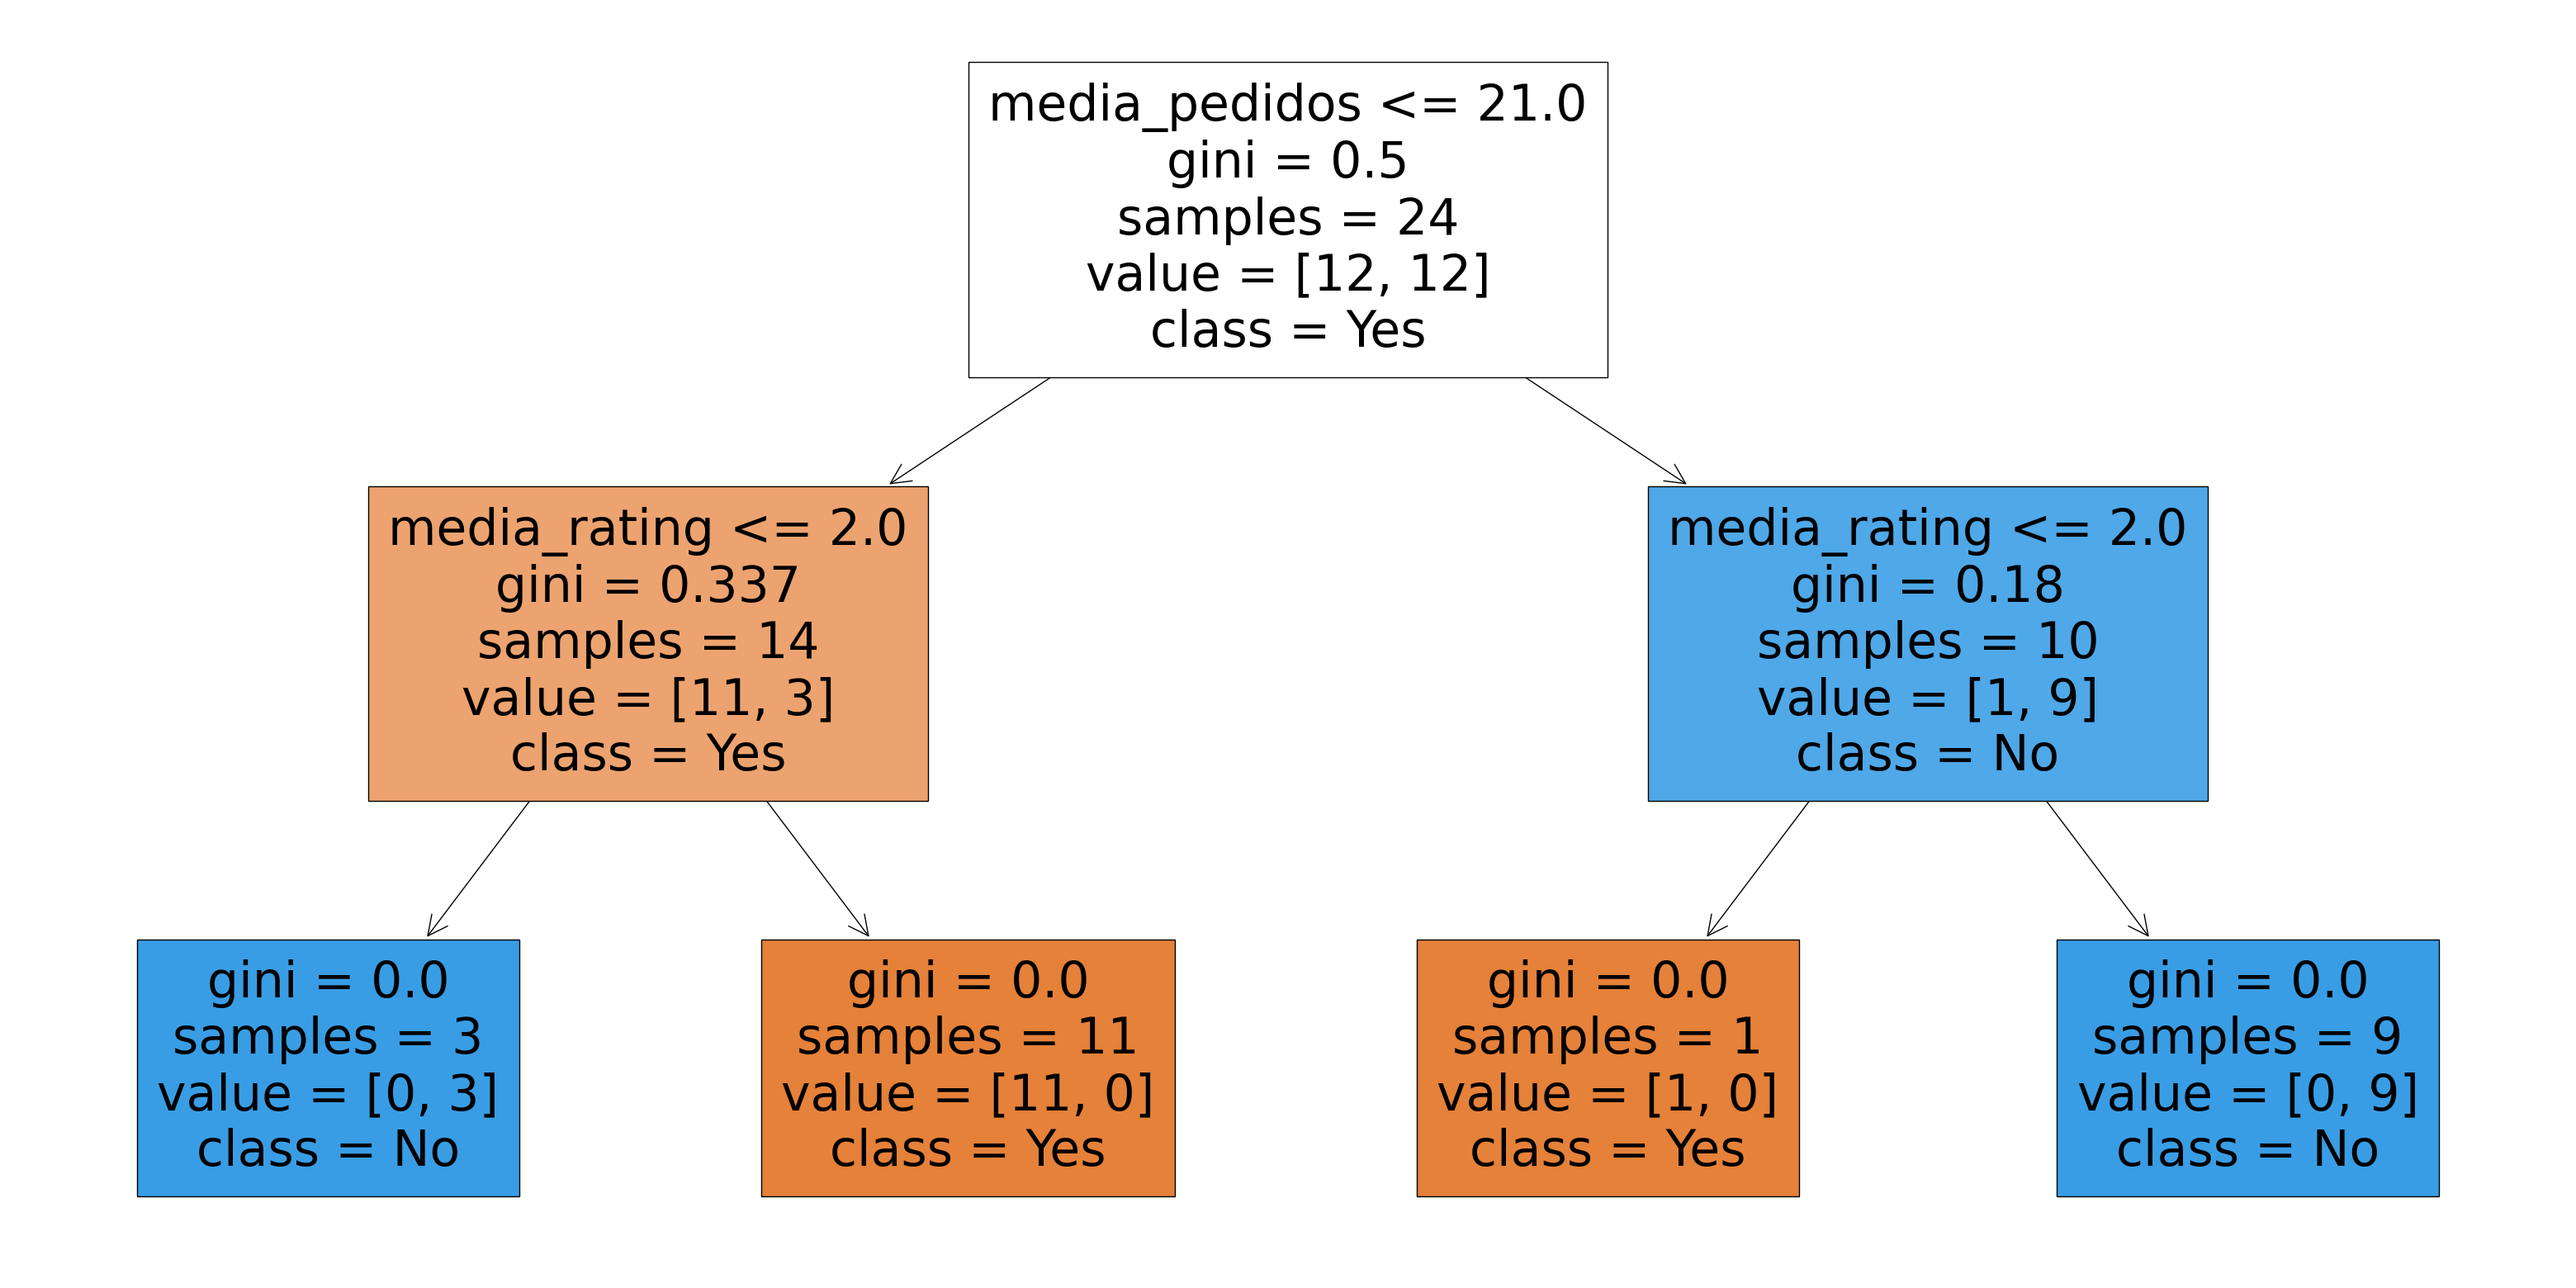

In [893]:
árvore_de_decisão.gráfico_de_decisão(
    dataframe=df_sales,
    treinamento=training
);

# KNN:

## Dataframe:

### Vinho:

In [894]:
df_wine = datasets.load_wine()

In [895]:
display(df_wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## Código:

In [896]:
class KNN(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            random_state=42
        )

        training = (
            KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore
    
    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   


if __name__ == '__main__':
    knn = KNN()

# Output:

### Data Understanding:

In [897]:
display(df_wine.feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Data Preparetion:

### Modelo:

In [898]:
training, y_pred, y_test = knn.training(
    x=df_wine.data,
    y=df_wine.target
);

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [899]:
knn.métrica(
    y_pred=y_pred,
    y_test=y_test
)

Accuracy: 0.7222222222222222


# SVM:

## Dataframe:

In [900]:
df_bc = datasets.load_breast_cancer()

In [901]:
display(df_bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Código:

In [902]:
class SVM(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.3, 
            random_state=1, 
            stratify=y
        )

        training_std = (
            StandardScaler().fit(x_train, y_train)
        )

        x_train_std = training_std.transform(x_train)
        x_test_std = training_std.transform(x_test)

        svc = (
            SVC(C=1.0, random_state=1, kernel='linear')
            .fit(x_train_std, y_train)
        )

        training = (
            svc.fit(x_train_std, y_train)
        )

        y_pred = svc.predict(x_test_std)

        return training, y_pred, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore
    
    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

    def gráfico_de_dispersão(self, x, y):
        gráfico = plt.scatter(x[:, 0], x[:, 1], c=y)
        return gráfico


if __name__ == '__main__':
    svm = SVM()

## Output:

### Data Understanding:

### Data Preparetion:

### Data Visualization:

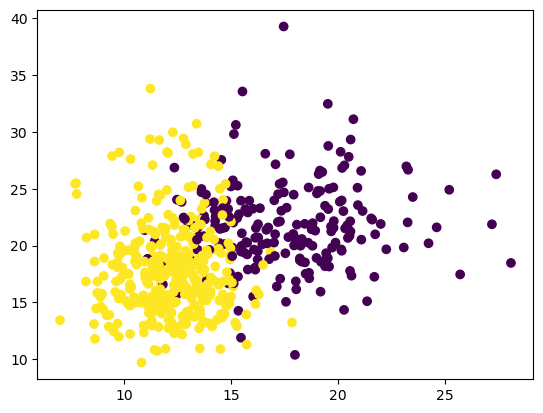

In [903]:
svm.gráfico_de_dispersão(
    x=df_bc.data,
    y=df_bc.target,
)

### Modelo:

In [904]:
training, y_pred, y_test = svm.training(
    x = df_bc.data,
    y = df_bc.target
)

In [905]:
svm.métrica(
    y_pred=y_pred, 
    y_test=y_test
)

Accuracy score 0.953


# Métricas:

## Dataframe:

### Bank:

In [906]:
path = r'../../../../data/Bank_Personal_Loan_Modelling.xlsx'
df_bank = pd.read_excel(
    io=path
)

In [907]:
display(df_bank.head())

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Código:

In [908]:
class Métricas(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            stratify=y
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        x_test.assign(churn = y_test).assign(label = training.predict(x_test))

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_métricas(self, training, x_test, y_test):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_métricas = plot_confusion_matrix(training, x_test, y_test, values_format='d');

        return gráfico_de_métricas
    
    def métrica(self, training, x_train, x_test, y_train, y_test):
        print(f"Acurácia (Treino): {accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia (Teste): {accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Precision (Treino): {precision_score(y_train, training.predict(x_train))}")
        print(f"Precision (Teste): {precision_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Recall (Treino): {recall_score(y_train, training.predict(x_train))}")
        print(f"Recall (Teste): {recall_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"F1-Score (Treino): {f1_score(y_train, training.predict(x_train))}")
        print(f"F1-Score (Teste): {f1_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"ROCAUC (Treino): {roc_auc_score(y_train, training.predict_proba(x_train)[:,1])}")
        print(f"ROCAUC (Teste): {roc_auc_score(y_test, training.predict_proba(x_test)[:,1])}")
    
    def gráfico_de_roc_curve(self, training, x_test, y_test):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_métricas = plot_roc_curve(training, x_test, y_test)

        return gráfico_de_métricas

    def avaliação_das_métricas(self, training, x_train, x_test, y_train, y_test):
        metricas = {
            'model': ['Logistic Regression', 'Logistic Regression'],
            'modo': ['treino', 'teste'],
            'accuracy': [accuracy_score(y_train, training.predict(x_train)), accuracy_score(y_test, training.predict(x_test))],
            'balanced_accuracy': [balanced_accuracy_score(y_train, training.predict(x_train)), balanced_accuracy_score(y_test, training.predict(x_test))],
            'precision': [precision_score(y_train, training.predict(x_train)), precision_score(y_test, training.predict(x_test))],
            'recall': [recall_score(y_train, training.predict(x_train)), recall_score(y_test, training.predict(x_test))],
            'f1_score': [f1_score(y_train, training.predict(x_train)), f1_score(y_test, training.predict(x_test))],
            'rocauc': [roc_auc_score(y_train, training.predict_proba(x_train)[:,1]), roc_auc_score(y_test, training.predict_proba(x_test)[:,1])]

        }

        return pd.DataFrame(metricas)


if __name__ == '__main__':
    métricas = Métricas()

## Output:

### Data Understanding:

In [909]:
display(df_bank.head())

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [910]:
métricas.verificando_as_dimensões_do_dataframe(dataframe=df_bank)

Linhas: 5000 
Colunas: 13


In [911]:
df_bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [912]:
métricas.verificando_valores_nulos(dataframe=df_bank)

### Data Preparetion:

In [913]:
df_bank_cppy = df_bank.copy()

### Data Visualization:

### Modelo:

In [914]:
x = df_bank[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_bank[['Personal_Loan']]

In [915]:
training, y_pred, x_train, x_test, y_train, y_test = métricas.training(
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 4000x2000 with 0 Axes>

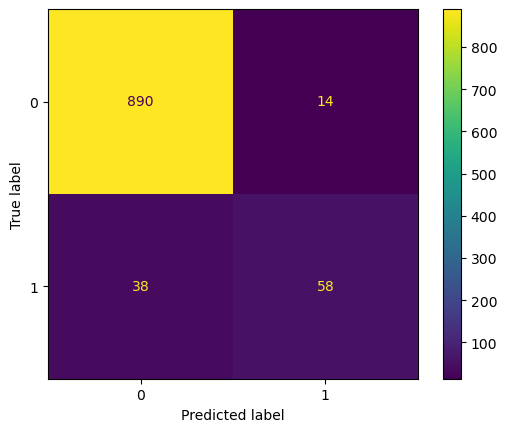

In [916]:
métricas.gráfico_de_métricas(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [917]:
métricas.métrica(
    training=training,
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Acurácia (Treino): 0.95075
Acurácia (Teste): 0.948
Acurácia Balanceada (Treino): 0.7993524151917404
Acurácia Balanceada (Teste): 0.7943399705014749
Precision (Treino): 0.8303886925795053
Precision (Teste): 0.8055555555555556
Recall (Treino): 0.6119791666666666
Recall (Teste): 0.6041666666666666
F1-Score (Treino): 0.704647676161919
F1-Score (Teste): 0.6904761904761905
ROCAUC (Treino): 0.9548066175792773
ROCAUC (Teste): 0.9410029498525074


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


<Figure size 4000x2000 with 0 Axes>

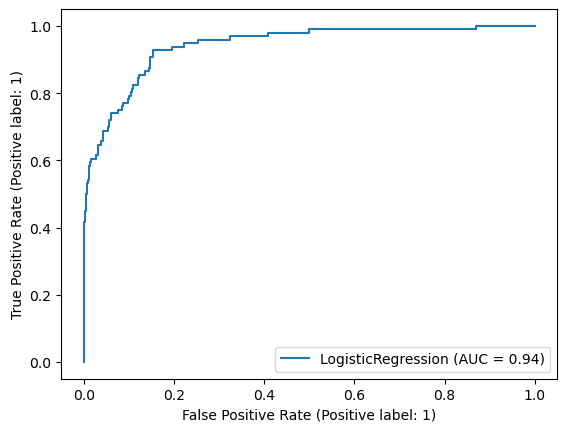

In [918]:
métricas.gráfico_de_roc_curve(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [919]:
métricas.avaliação_das_métricas(
    training=training,
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

model    modo  accuracy  balanced_accuracy  precision  \
0  Logistic Regression  treino   0.95075           0.799352   0.830389   
1  Logistic Regression   teste   0.94800           0.794340   0.805556   

     recall  f1_score    rocauc  
0  0.611979  0.704648  0.954807  
1  0.604167  0.690476  0.941003

# Tunning de Hiperparâmetros:

## Dataframe:

#### Bnnk:

In [920]:
path = r'../../../../data/Bank_Personal_Loan_Modelling.xlsx'
df_bank = pd.read_excel(
    io=path
)

In [921]:
display(df_bank.head())

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Código:

In [922]:
class HyperparameterTuning(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            stratify=y
        )

        training = (
            DecisionTreeClassifier().fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        x_test.assign(churn = y_test).assign(label = training.predict(x_test))

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def métrica(self, training, x_train, x_test, y_train, y_test):
        print(f"Acurácia (Treino): {accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia (Teste): {accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Precision (Treino): {precision_score(y_train, training.predict(x_train))}")
        print(f"Precision (Teste): {precision_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Recall (Treino): {recall_score(y_train, training.predict(x_train))}")
        print(f"Recall (Teste): {recall_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"F1-Score (Treino): {f1_score(y_train, training.predict(x_train))}")
        print(f"F1-Score (Teste): {f1_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"ROCAUC (Treino): {roc_auc_score(y_train, training.predict_proba(x_train)[:,1])}")
        print(f"ROCAUC (Teste): {roc_auc_score(y_test, training.predict_proba(x_test)[:,1])}")

    def optimize_parameters_grid_search(self, training):
        # Criamos um dicionário que os hiperparâmetros que queremos treinar o modelo
        parameters = {
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        }

        # Criamos um GridSearch passando o modelo, os parâmetros, a métrica que queremos otimizar. 
        grid_search = GridSearchCV(training, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

        training = grid_search.fit(x_train, y_train)

        parameters = training.best_estimator_.get_params()

        return parameters, grid_search
    
    def optimize_parameters_randomized_search(self):
        # Criamos um dicionário que os hiperparâmetros que queremos treinar o modelo
        parameters = {
            'learning_rate': [0.001, 0.01], 
            'num_leaves': [2, 128],
            'min_child_samples': [1, 100],
            'subsample': [0.05, 1.0],
            'colsample_bytree': [0.1, 1.0]
        }

        # Criamos um GridSearch passando o modelo, os parâmetros, a métrica que queremos otimizar. 
        lgbm = LGBMClassifier(n_jobs=-1)
        random_search = RandomizedSearchCV(lgbm, parameters, scoring='roc_auc', cv=5, n_iter=5, n_jobs=-1)

        random_search = random_search.fit(x_train, y_train)

        return parameters, random_search
    
    def optimal_training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            stratify=y
        )

        training = (
            DecisionTreeClassifier(
                ccp_alpha = 0.0,
                class_weight= None,
                criterion = 'gini',
                max_depth = 3,
                max_features = None,
                max_leaf_nodes = None,
                min_impurity_decrease = 0.0,
                min_samples_leaf = 1,
                min_samples_split = 2,
                min_weight_fraction_leaf = 0.0,
                random_state = None,
                splitter = 'best'
            ).fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        x_test.assign(churn = y_test).assign(label = training.predict(x_test))

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def resultados_do_search(self, search):
        # criando uma tabela com os resultados do grid_search
        results = pd.DataFrame(search.cv_results_)

        # rankeando esses resultados
        return results.sort_values(by='rank_test_score')

    def avaliação_das_métricas(self, training, x_train, x_test, y_train, y_test):
        metricas = {
            'model': ['Logistic Regression', 'Logistic Regression'],
            'modo': ['treino', 'teste'],
            'accuracy': [accuracy_score(y_train, training.predict(x_train)), accuracy_score(y_test, training.predict(x_test))],
            'balanced_accuracy': [balanced_accuracy_score(y_train, training.predict(x_train)), balanced_accuracy_score(y_test, training.predict(x_test))],
            'precision': [precision_score(y_train, training.predict(x_train)), precision_score(y_test, training.predict(x_test))],
            'recall': [recall_score(y_train, training.predict(x_train)), recall_score(y_test, training.predict(x_test))],
            'f1_score': [f1_score(y_train, training.predict(x_train)), f1_score(y_test, training.predict(x_test))],
            'rocauc': [roc_auc_score(y_train, training.predict_proba(x_train)[:,1]), roc_auc_score(y_test, training.predict_proba(x_test)[:,1])]
        }

        return pd.DataFrame(metricas)


if __name__ == '__main__':
    hyperparameter_tuning = HyperparameterTuning()

## Output:

### Data Understanding:

In [923]:
display(df_bank.head())

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [924]:
hyperparameter_tuning.verificando_valores_nulos(dataframe=df_bank)

### Data Preparetion:

### Data Visualization:

### Modelo:

In [925]:
x = df_bank[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_bank['Personal_Loan']

In [926]:
training, y_pred, x_train, x_test, y_train, y_test = hyperparameter_tuning.training(
    x=x,
    y=y
)

In [927]:
hyperparameter_tuning.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 1.0
Acurácia (Teste): 0.977
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.9221054572271385
Precision (Treino): 1.0
Precision (Teste): 0.9010989010989011
Recall (Treino): 1.0
Recall (Teste): 0.8541666666666666
F1-Score (Treino): 1.0
F1-Score (Teste): 0.8770053475935828
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.9221054572271385


In [928]:
parameters, grid_search = hyperparameter_tuning.optimize_parameters_grid_search(training=training)
print(parameters)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [929]:
training, y_pred, x_train, x_test, y_train, y_test = hyperparameter_tuning.optimal_training(
    x=x,
    y=y
)

In [930]:
hyperparameter_tuning.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 0.9825
Acurácia (Teste): 0.987
Acurácia Balanceada (Treino): 0.9135094026548672
Acurácia Balanceada (Teste): 0.9416021386430679
Precision (Treino): 0.9875776397515528
Precision (Teste): 0.9770114942528736
Recall (Treino): 0.828125
Recall (Teste): 0.8854166666666666
F1-Score (Treino): 0.9008498583569405
F1-Score (Teste): 0.9289617486338797
ROCAUC (Treino): 0.9944726274428467
ROCAUC (Teste): 0.9969810103244837


In [931]:
hyperparameter_tuning.resultados_do_search(
    search=grid_search
)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       0.007335      0.000992         0.004712        0.000512   
3       0.007290      0.001408         0.005041        0.001183   
4       0.008457      0.001630         0.007005        0.004681   
5       0.009488      0.002356         0.005111        0.000509   
6       0.008292      0.001193         0.005207        0.000552   
1       0.006964      0.000851         0.005226        0.001196   
7       0.007928      0.001105         0.004442        0.000757   
8       0.008061      0.001627         0.004393        0.000190   
9       0.005980      0.000792         0.004354        0.002093   
0       0.004762      0.000561         0.004290        0.000330   

  param_max_depth             params  split0_test_score  split1_test_score  \
2               3   {'max_depth': 3}           0.994393           0.995851   
3               4   {'max_depth': 4}           0.995011           0.997539   
4               5   {'max_depth': 5}           0.963271           0.997315   
5               6   {'max_depth': 6}           0.962934           0.996623   
6               7   {'max_depth': 7}           0.956864           0.996246   
1               2   {'max_depth': 2}           0.958727           0.974349   
7               8   {'max_depth': 8}           0.949322           0.944352   
8               9   {'max_depth': 9}           0.943697           0.935703   
9              10  {'max_depth': 10}           0.937255           0.931059   
0               1   {'max_depth': 1}           0.856136           0.845467   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
2           0.986079           0.993821           0.996991         0.993427   
3           0.981301           0.992150           0.997791         0.992758   
4           0.980367           0.968467           0.991099         0.980104   
5           0.964254           0.967820           0.979352         0.974197   
6           0.960240           0.961219           0.978274         0.970568   
1           0.947513           0.966625           0.976586         0.964760   
7           0.940059           0.943364           0.976900         0.950799   
8           0.940921           0.937247           0.978256         0.947165   
9           0.934481           0.941756           0.963383         0.941587   
0           0.853344           0.835938           0.875707         0.853318   

   std_test_score  rank_test_score  
2        0.003838                1  
3        0.006081                2  
4        0.012930                3  
5        0.012616                4  
6        0.014837                5  
1        0.010669                6  
7        0.013384                7  
8        0.015795                8  
9        0.011447                9  
0        0.013213               10

# Randomized Search:

In [932]:
parameters, random_search = hyperparameter_tuning.optimize_parameters_randomized_search()

In [933]:
hyperparameter_tuning.resultados_do_search(
    search=random_search
)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.054081      0.003991         0.004709        0.000338   
3       0.035288      0.003792         0.007389        0.001040   
2       0.034515      0.003569         0.005975        0.001218   
0       0.037099      0.006050         0.004806        0.000299   
1       0.042711      0.007757         0.005555        0.001549   

  param_subsample param_num_leaves param_min_child_samples  \
4            0.05              128                     100   
3            0.05                2                       1   
2             1.0                2                     100   
0             1.0                2                     100   
1             1.0                2                       1   

  param_learning_rate param_colsample_bytree  \
4               0.001                    1.0   
3                0.01                    0.1   
2                0.01                    0.1   
0                0.01                    1.0   
1               0.001                    1.0   

                                              params  split0_test_score  \
4  {'subsample': 0.05, 'num_leaves': 128, 'min_ch...           0.972594   
3  {'subsample': 0.05, 'num_leaves': 2, 'min_chil...           0.943007   
2  {'subsample': 1.0, 'num_leaves': 2, 'min_child...           0.940317   
0  {'subsample': 1.0, 'num_leaves': 2, 'min_child...           0.932611   
1  {'subsample': 1.0, 'num_leaves': 2, 'min_child...           0.866622   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.980376           0.986528           0.975786           0.984076   
3           0.953683           0.933933           0.929038           0.949660   
2           0.951600           0.931131           0.925203           0.947621   
0           0.950666           0.942888           0.925661           0.939466   
1           0.884814           0.901151           0.800974           0.875276   

   mean_test_score  std_test_score  rank_test_score  
4         0.979872        0.005136                1  
3         0.941864        0.009265                2  
2         0.939174        0.009868                3  
0         0.938258        0.008572                4  
1         0.865767        0.034363                5

# Interpretabilidade:

## Dataframe:

### Câncer de mam:

In [934]:
df_breast_cancer = load_breast_cancer()

In [935]:
display(df_breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Código:

In [936]:
class Interpretabilidade(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            train_size=0.90, 
            test_size=0.1, 
            stratify=y, 
            random_state=123
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def métrica(self, training, x_train, x_test, y_train, y_test):
        print("Test  Accuracy : %.2f"%training.score(x_test, y_test))
        print("Train Accuracy : %.2f"%training.score(x_train, y_train))
        print()
        print("Confusion Matrix : ")
        print(confusion_matrix(y_test, training.predict(x_test)))
        print()
        print("Classification Report")
        print(classification_report(y_test, training.predict(x_test)))

    def avaliação_das_métricas(self, training, x_train, x_test, y_train, y_test):
        metricas = {
            'model': ['Logistic Regression', 'Logistic Regression'],
            'modo': ['treino', 'teste'],
            'accuracy': [accuracy_score(y_train, training.predict(x_train)), accuracy_score(y_test, training.predict(x_test))],
            'balanced_accuracy': [balanced_accuracy_score(y_train, training.predict(x_train)), balanced_accuracy_score(y_test, training.predict(x_test))],
            'precision': [precision_score(y_train, training.predict(x_train)), precision_score(y_test, training.predict(x_test))],
            'recall': [recall_score(y_train, training.predict(x_train)), recall_score(y_test, training.predict(x_test))],
            'f1_score': [f1_score(y_train, training.predict(x_train)), f1_score(y_test, training.predict(x_test))],
            'rocauc': [roc_auc_score(y_train, training.predict_proba(x_train)[:,1]), roc_auc_score(y_test, training.predict_proba(x_test)[:,1])]
        }

        return pd.DataFrame(metricas)
    
    def gráfico_lime_x(self, dataframe, training, x_train, x_test, y_test):
        explainer = lime_tabular.LimeTabularExplainer(
            x_train, 
            mode="classification",
            class_names=dataframe.target_names,
            feature_names=dataframe.feature_names,
        )
        idx = random.randint(1, len(x_test))

        explanation = explainer.explain_instance(
            x_test[idx], 
            training.predict_proba,
            num_features=len(dataframe.feature_names)
        )

        print("Prediction : ", dataframe.target_names[training.predict(x_test[idx].reshape(1,-1))[0]])
        print("Actual :     ", dataframe.target_names[y_test[idx]])

        explanation.show_in_notebook()

    def gráfico_lime_y(self, dataframe, training, x_train, x_test, y_test):
        explainer = lime_tabular.LimeTabularExplainer(
            x_train, 
            mode="classification",
            class_names=dataframe.target_names,
            feature_names=dataframe.feature_names,
        )
        
        preds = training.predict(x_test)

        false_preds = np.argwhere((preds != y_test)).flatten()

        idx  = random.choice(false_preds)

        explanation = explainer.explain_instance(x_test[idx], training.predict_proba)

        print("Prediction : ", dataframe.target_names[training.predict(x_test[idx].reshape(1,-1))[0]])
        print("Actual :     ", dataframe.target_names[y_test[idx]])

        explanation.show_in_notebook()

    def gráfico_de_ggplot(self, dataframe, training):
        with plt.style.context("ggplot"):
            fig = plt.figure(figsize=(8,6))
            plt.barh(
                range(len(training.coef_[0])), 
                training.coef_[0], color=["red" if coef<0 else "green" for coef in training.coef_[0]]
            )
            plt.yticks(
                range(len(training.coef_[0])), 
                dataframe.feature_names
            );
            plt.title("Weights")
    

if __name__ == '__main__':
    interpretabilidade = Interpretabilidade()

## Output:

### Data Understanding:

In [937]:
for line in df_breast_cancer.DESCR.split("\n")[5:32]:
    print(line)

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

### Data Preparetion:

### Data Visualization:

### Modelo:

In [938]:
x = df_breast_cancer.data
y = df_breast_cancer.target

In [939]:
training, y_pred, x_train, x_test, y_train, y_test = interpretabilidade.training(
    x=x,
    y=y
)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [940]:
interpretabilidade.métrica(
    training=training, 
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Test  Accuracy : 0.95
Train Accuracy : 0.95

Confusion Matrix : 
[[20  1]
 [ 2 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [941]:
interpretabilidade.gráfico_lime_x(
    dataframe=df_breast_cancer,
    training=training, 
    x_train=x_train, 
    x_test=x_test, 
    y_test=y_test
)

Prediction :  malignant
Actual :      malignant


In [942]:
interpretabilidade.gráfico_lime_y(
    dataframe=df_breast_cancer,
    training=training, 
    x_train=x_train, 
    x_test=x_test, 
    y_test=y_test
)

Prediction :  malignant
Actual :      benign


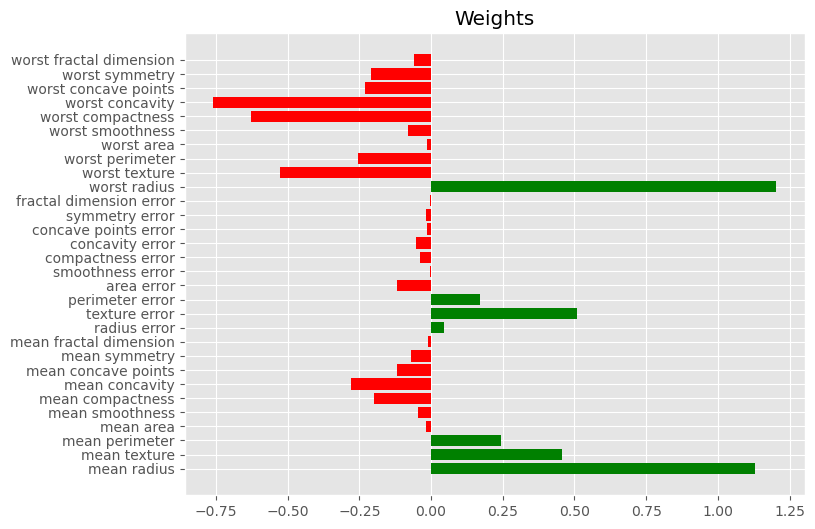

In [943]:
interpretabilidade.gráfico_de_ggplot(
    dataframe=df_breast_cancer,
    training=training, 
)

In [944]:
# shap.initjs()
# shap.initjs()
# corpus,y = shap.datasets.imdb()
# corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

# vectorizer = TfidfVectorizer(min_df=10)
# X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
# X_test = vectorizer.transform(corpus_test).toarray()
# model = sklearn.linear_model.LogisticRegression()
# model.fit(X_train, y_train)
# explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
# shap_values = explainer(X_test)
# shap.plots.beeswarm(shap_values)


# Redes Neurais:

## Dataframe:

In [945]:
path = r'../../../../data/churn.xlsx'
df_churn = pd.read_excel(
    io=path,
)

In [946]:
display(df_churn.head())

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges Churn  
0  Electronic check           29.85         29.85    No  
1      Mailed check           56.95       1889.50    No  
2      Mailed check           53.85        108.15   Yes  
3     Bank transfer           42.30       1840.75    No  
4  Electronic check           70.70        151.65   Yes

## Código:

In [947]:
class RedesNeurais(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            test_size=0.2, 
            random_state=7
        )

        training = (
            MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='logistic')
            .fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        # print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")

        return training, y_pred, x_train, x_test, y_train, y_test

if __name__ == '__main__':
    redes_neurais = RedesNeurais()

## Output:

### Data Understanding:

In [948]:
display(df_churn.head())

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges Churn  
0  Electronic check           29.85         29.85    No  
1      Mailed check           56.95       1889.50    No  
2      Mailed check           53.85        108.15   Yes  
3     Bank transfer           42.30       1840.75    No  
4  Electronic check           70.70        151.65   Yes

In [949]:
df_churn.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [950]:
redes_neurais.verificando_valores_nulos(dataframe=df_churn)

In [951]:
redes_neurais.verificando_tipos(dataframe=df_churn)

Tipos
customerID         object
tenure              int64
PhoneService       object
Contract           object
PaperlessBilling   object
PaymentMethod      object
MonthlyCharges    float64
TotalCharges      float64
Churn              object

### Data Preparetion:

In [952]:
x = ['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
y = ['Churn']

In [953]:
df_churn['Churn'] = redes_neurais.label_endcode(
    dataframe=df_churn['Churn'],
)

In [954]:
dataframe, colunas = redes_neurais.dummy(
    dataframe=df_churn,
    colunas=x
)
df_churn[colunas] = dataframe[colunas]

In [955]:
df_churn = redes_neurais.removendo_colunas(dataframe=df_churn, colunas=x)

In [956]:
display(df_churn.head())

customerID  Churn  PhoneService_No  PhoneService_Yes  \
0  7590-VHVEG      0                1                 0   
1  5575-GNVDE      0                0                 1   
2  3668-QPYBK      1                0                 1   
3  7795-CFOCW      0                1                 0   
4  9237-HQITU      1                0                 1   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  PaymentMethod_Bank transfer  \
0                    0                     1                            0   
1                    1                     0                            0   
2                    0                     1                            0   
3                    1                     0                            1   
4                    0                     1                            0   

   PaymentMethod_Credit card  PaymentMethod_Electronic check  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0

### Data Visualization:

### Modelo:

In [957]:
df_churn.columns

Index(['customerID', 'Churn', 'PhoneService_No', 'PhoneService_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [958]:
x = df_churn[[
    'PhoneService_No', 'PhoneService_Yes',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaperlessBilling_No', 'PaperlessBilling_Yes',
    'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]]
y = df_churn[['Churn']]

In [959]:
training, y_pred, x_train, x_test, y_train, y_test = redes_neurais.training(
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


# Case:

## Dataframe:

In [960]:
path = r'../../../../data/churn_data.xlsx'

df_churn_data = pd.read_excel(
    io=path,
)

In [961]:
display(df_churn_data.head())

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Código:

In [962]:
class Case(DataVisualization):
    def training(self, x: pd.DataFrame, y: pd.DataFrame):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            random_state=46
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)

    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   


if __name__ == '__main__':
    case = Case()

## Output:

### Data Understanding:

In [963]:
display(df_churn_data.head())

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [964]:
df_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [965]:
case.verificando_as_dimensões_do_dataframe(
    dataframe=df_churn_data
)

Linhas: 7032 
Colunas: 21


In [966]:
case.descrição(
    dataframe=df_churn_data
)

SeniorCitizen   tenure  MonthlyCharges  TotalCharges
count        7032.00  7032.00         7032.00       7032.00
mean            0.16    32.42           64.80       2283.30
std             0.37    24.55           30.09       2266.77
min             0.00     1.00           18.25         18.80
25%             0.00     9.00           35.59        401.45
50%             0.00    29.00           70.35       1397.48
75%             0.00    55.00           89.86       3794.74
max             1.00    72.00          118.75       8684.80

In [967]:
case.verificando_tipos(
    dataframe=df_churn_data
)

Tipos
customerID         object
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
OnlineSecurity     object
OnlineBackup       object
DeviceProtection   object
TechSupport        object
StreamingTV        object
StreamingMovies    object
Contract           object
PaperlessBilling   object
PaymentMethod      object
MonthlyCharges    float64
TotalCharges      float64
Churn              object

In [968]:
case.verificando_valores_nulos(
    dataframe=df_churn_data
)

In [969]:
case.verificando_valores_duplicados(
    dataframe=df_churn_data
)

In [970]:
display(df_churn_data.iloc[:, 1:].head())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [971]:
colunas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 
]

In [972]:
for coluna in colunas:
    resultado = case.frequencia_da_repetição_dos_valores(
        dataframe=df_churn_data,
        coluna=coluna
    )

    print(f'{coluna}:')
    display(resultado)

gender:


index  gender
0    Male    3549
1  Female    3483

SeniorCitizen:


index  SeniorCitizen
0      0           5890
1      1           1142

Partner:


index  Partner
0    No     3639
1   Yes     3393

Dependents:


index  Dependents
0    No        4933
1   Yes        2099

PhoneService:


index  PhoneService
0   Yes          6352
1    No           680

MultipleLines:


index  MultipleLines
0                No           3385
1               Yes           2967
2  No phone service            680

InternetService:


index  InternetService
0  Fiber optic             3096
1          DSL             2416
2           No             1520

OnlineSecurity:


index  OnlineSecurity
0                   No            3497
1                  Yes            2015
2  No internet service            1520

OnlineBackup:


index  OnlineBackup
0                   No          3087
1                  Yes          2425
2  No internet service          1520

DeviceProtection:


index  DeviceProtection
0                   No              3094
1                  Yes              2418
2  No internet service              1520

TechSupport:


index  TechSupport
0                   No         3472
1                  Yes         2040
2  No internet service         1520

StreamingTV:


index  StreamingTV
0                   No         2809
1                  Yes         2703
2  No internet service         1520

StreamingMovies:


index  StreamingMovies
0                   No             2781
1                  Yes             2731
2  No internet service             1520

Contract:


index  Contract
0  Month-to-month      3875
1        Two year      1685
2        One year      1472

PaperlessBilling:


index  PaperlessBilling
0   Yes              4168
1    No              2864

PaymentMethod:


index  PaymentMethod
0           Electronic check           2365
1               Mailed check           1604
2  Bank transfer (automatic)           1542
3    Credit card (automatic)           1521

### Data Preparation:

In [973]:
df_churn_data_copy = df_churn_data.copy()

In [974]:
colunas = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'Contract', 
    'PaperlessBilling'
]

In [975]:
for coluna in colunas:
    df_churn_data[coluna] = case.label_endcode(
        dataframe=df_churn_data[coluna],
    )

In [976]:
x = df_churn_data.drop(['Churn', 'customerID'], axis=1)
y = df_churn_data[['Churn']]

In [977]:
x = case.dummy_todas_as_colunas(
    dataframe=x
)

In [978]:
display(x.head())

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              1               0             2                 0  ...   
1              0               2             0                 2  ...   
2              0               2             2                 0  ...   
3              1               2             0                 2  ...   
4              0               0             0                 0  ...   

   StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  \
0               1                                0                0   
1               1                                0                0   
2               1                                0                0   
3               1                                0                0   
4               1                                0                0   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  PaymentMethod_Bank transfer (automatic)  \
0                    0                                        0   
1                    0                                        0   
2                    0                                        0   
3                    0                                        1   
4                    0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 28 columns]

### Data Visualization:

### Modelo:

In [979]:
x = x
y = y

In [980]:
training, y_pred, x_train, x_test, y_train, y_test = case.training(
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [981]:
df_churn_data_copy['predictions'] = case.predictions(
    training=training,
    input=x
)

In [982]:
case.métrica(
    y_test=y_test,
    y_pred=y_pred
)

Accuracy: 0.8102345415778252


In [983]:
display(df_churn_data_copy[df_churn_data_copy.Churn != df_churn_data_copy.predictions])

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
2     3668-QPYBK    Male              0      No         No       2   
13    0280-XJGEX    Male              0      No         No      49   
18    4190-MFLUW  Female              0     Yes        Yes      10   
19    4183-MYFRB  Female              0      No         No      21   
...          ...     ...            ...     ...        ...     ...   
7000  5482-NUPNA  Female              0      No         No       4   
7010  1699-HPSBG    Male              0      No         No      12   
7015  8775-CEBBJ  Female              0      No         No       9   
7018  2235-DWLJU  Female              1      No         No       6   
7023  0639-TSIQW  Female              0      No         No      67   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
2             Yes                No             DSL            Yes  ...   
13            Yes               Yes     Fiber optic             No  ...   
18            Yes                No             DSL             No  ...   
19            Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7000          Yes                No             DSL            Yes  ...   
7010          Yes                No             DSL             No  ...   
7015          Yes                No             DSL             No  ...   
7018           No  No phone service             DSL             No  ...   
7023          Yes               Yes     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
2             No          No              No  Month-to-month              Yes   
13            No         Yes             Yes  Month-to-month              Yes   
18           Yes          No              No  Month-to-month               No   
19            No          No             Yes  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7000         Yes          No              No  Month-to-month              Yes   
7010         Yes         Yes              No        One year              Yes   
7015          No          No              No  Month-to-month              Yes   
7018          No         Yes             Yes  Month-to-month              Yes   
7023          No         Yes              No  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
2                  Mailed check          53.85       108.15    Yes   
13    Bank transfer (automatic)         103.70      5036.30    Yes   
18      Credit card (automatic)          55.20       528.35    Yes   
19             Electronic check          90.05      1862.90     No   
...                         ...            ...          ...    ...   
7000               Mailed check          60.40       272.15    Yes   
7010           Electronic check          59.80       727.80    Yes   
7015  Bank transfer (automatic)          44.20       403.35    Yes   
7018           Electronic check          44.40       263.05     No   
7023    Credit card (automatic)         102.95      6886.25    Yes   

      predictions  
0             Yes  
2              No  
13             No  
18             No  
19            Yes  
...           ...  
7000           No  
7010           No  
7015           No  
7018          Yes  
7023           No  

[1359 rows x 22 columns]